In [39]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import statistics
import seaborn as sns
from pandas.plotting import scatter_matrix

In [2]:
# Import Data

data = pd.read_csv("cancer.csv", header = 0, index_col = None)

In [3]:
data.describe()

#The age of the sample ranged from 30-83 with a mean of 52 and a standard deviation of 10
#The operations were conducted between 1958-1969 
#The average number of nodes detected per patient was 4 with a standard deviation of 7
#The majority of paitents (74%) survived for more than 5 years after the operation.

,Age,Year,Auxillary nodes,Survival
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


<IPython.core.display.Javascript object>


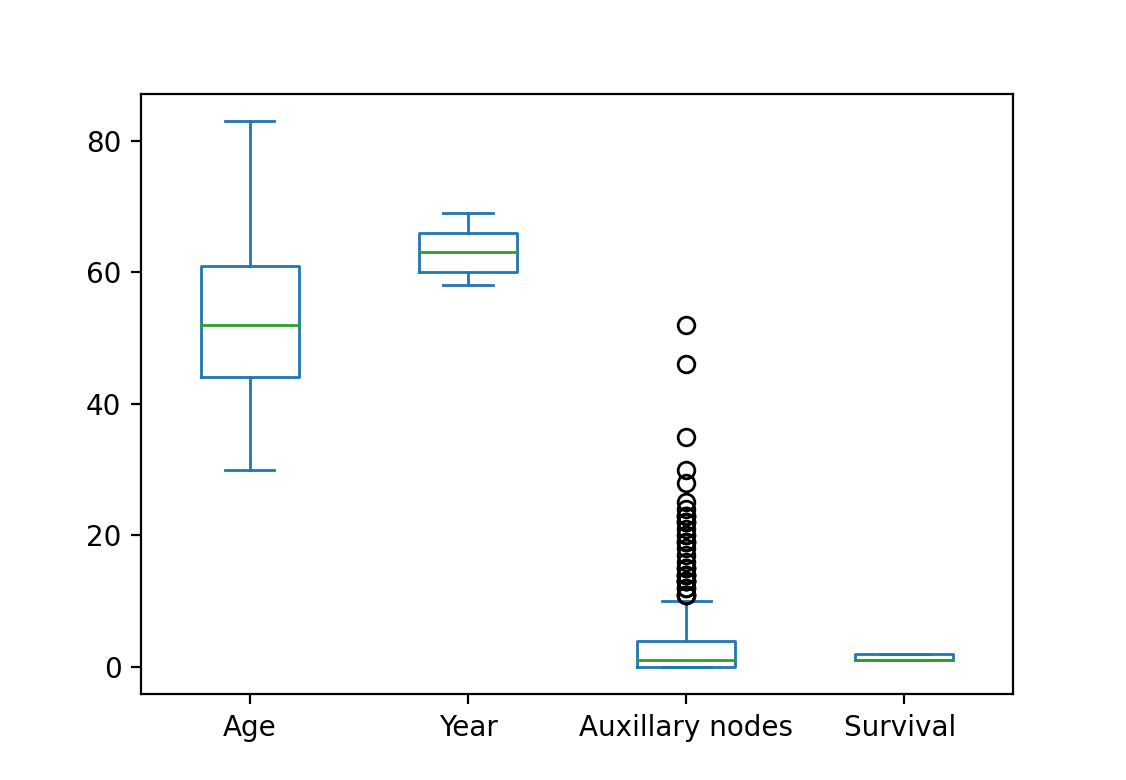

<AxesSubplot:>

In [4]:
# Box Plot
%matplotlib notebook
data.plot.box()

In [5]:
# Correlation

corr = data.corr()

corr

# Nodes and Survival are slightly positively correlated because Survival is a class attribute with less than 5 year survival as a 2. The more nodes a patient has the less likey they are to survive for more than 5 years after the surgery.
# This correlation (0.28) is not statistically significant enough to remove variables.

,Age,Year,Auxillary nodes,Survival
Age,1.000000,0.092623,-0.066548,0.064351
Year,0.092623,1.000000,-0.003277,-0.004076
Auxillary nodes,-0.066548,-0.003277,1.000000,0.286191
Survival,0.064351,-0.004076,0.286191,1.000000


<IPython.core.display.Javascript object>


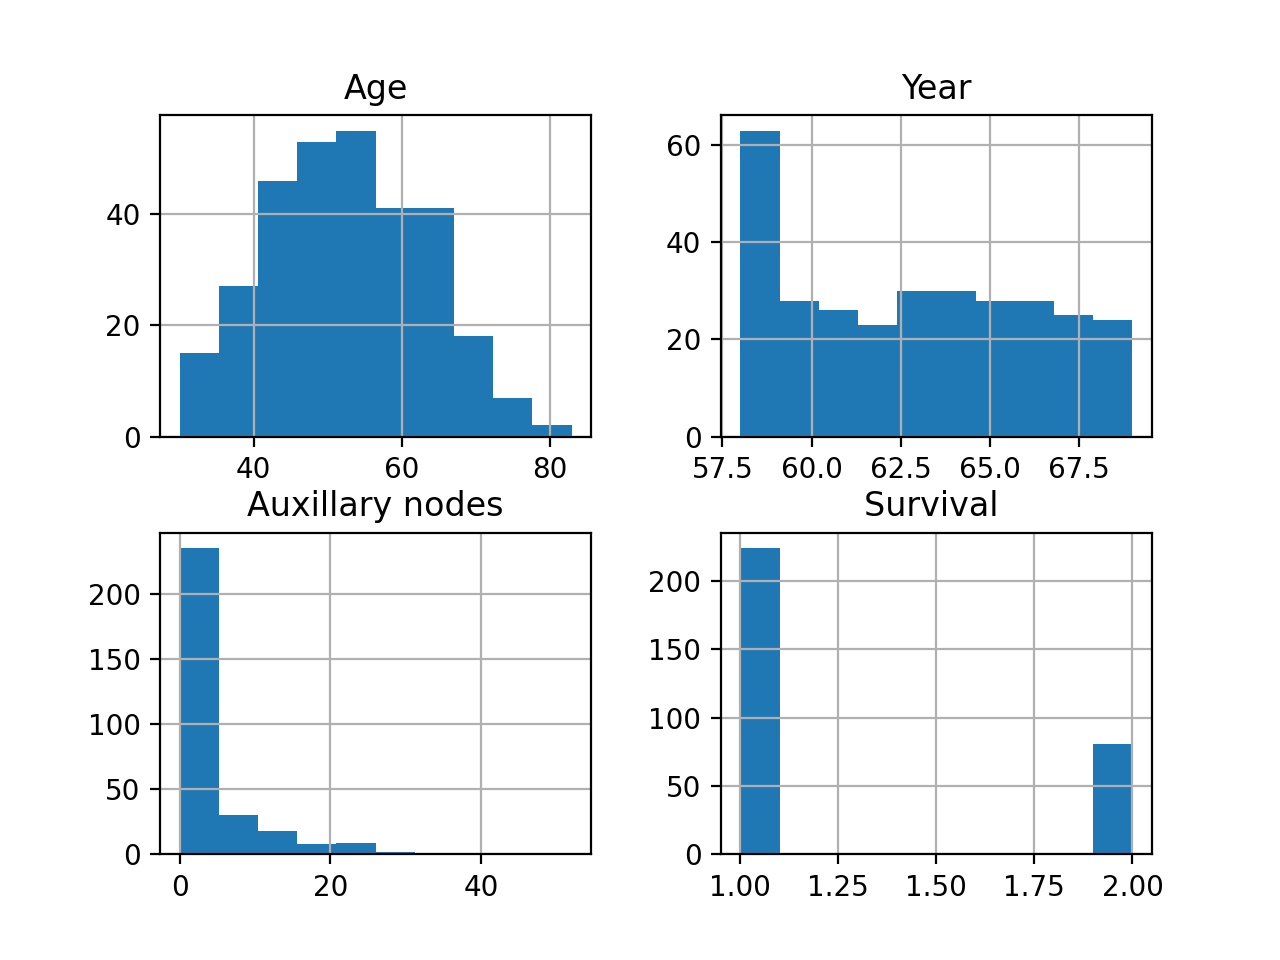

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Year'}>],
       [<AxesSubplot:title={'center':'Auxillary nodes'}>,
        <AxesSubplot:title={'center':'Survival '}>]], dtype=object)

In [6]:
# Skewness

data.hist()

#Age is normally distributed around the mean
#Year has a little negative skew but is overall uniform with the same number of operations per year
#Nodes has a strong negative skew. Most patients have few nodes.
#Survival is class data of 1 or 2 therefore it is bimodal

<IPython.core.display.Javascript object>


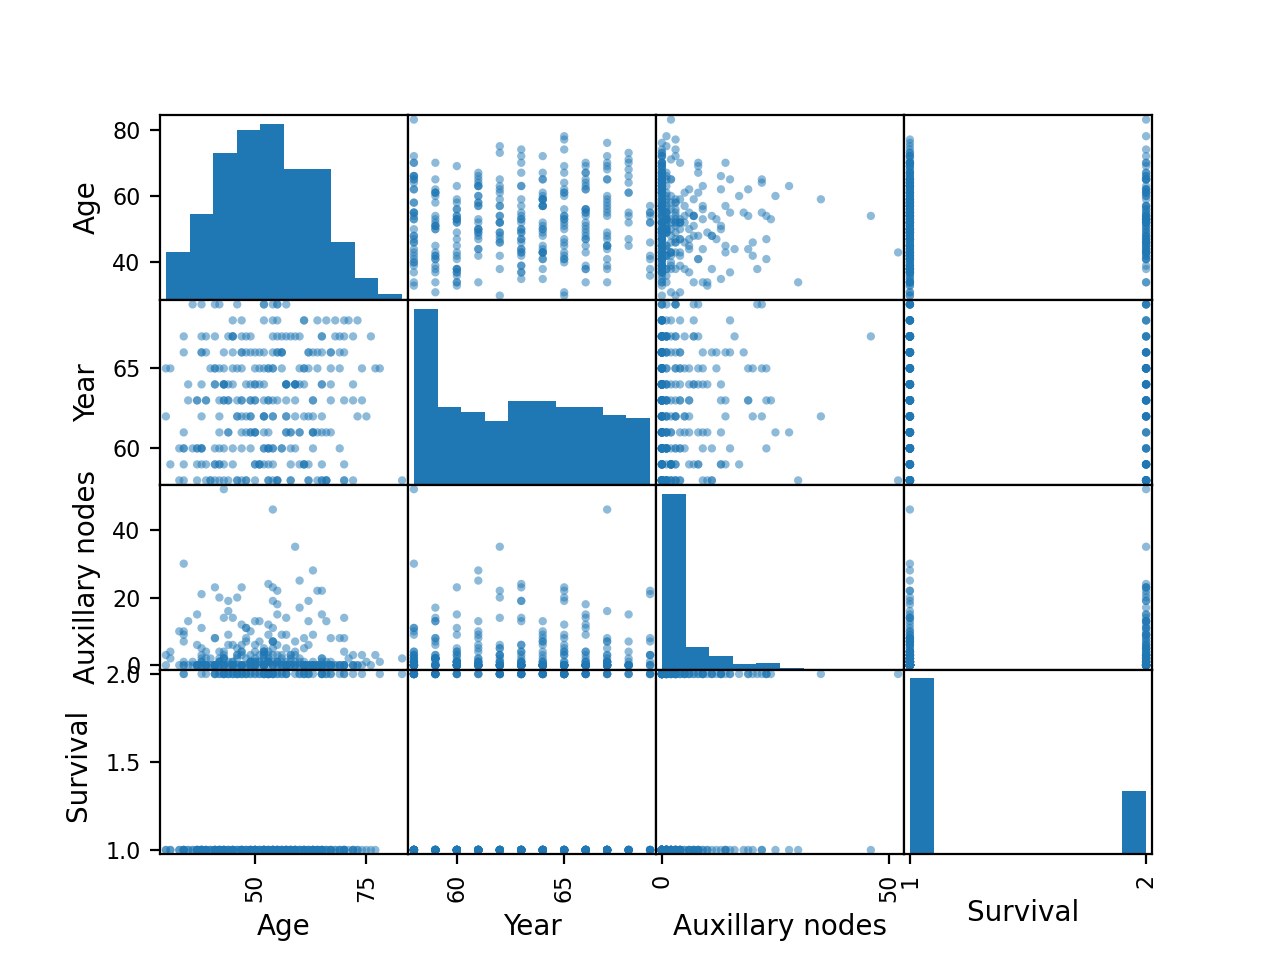

array([[<AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='Year', ylabel='Age'>,
        <AxesSubplot:xlabel='Auxillary nodes', ylabel='Age'>,
        <AxesSubplot:xlabel='Survival ', ylabel='Age'>],
       [<AxesSubplot:xlabel='Age', ylabel='Year'>,
        <AxesSubplot:xlabel='Year', ylabel='Year'>,
        <AxesSubplot:xlabel='Auxillary nodes', ylabel='Year'>,
        <AxesSubplot:xlabel='Survival ', ylabel='Year'>],
       [<AxesSubplot:xlabel='Age', ylabel='Auxillary nodes'>,
        <AxesSubplot:xlabel='Year', ylabel='Auxillary nodes'>,
        <AxesSubplot:xlabel='Auxillary nodes', ylabel='Auxillary nodes'>,
        <AxesSubplot:xlabel='Survival ', ylabel='Auxillary nodes'>],
       [<AxesSubplot:xlabel='Age', ylabel='Survival '>,
        <AxesSubplot:xlabel='Year', ylabel='Survival '>,
        <AxesSubplot:xlabel='Auxillary nodes', ylabel='Survival '>,
        <AxesSubplot:xlabel='Survival ', ylabel='Survival '>]],
      dtype=object)

In [42]:
scatter_matrix(data)

In [8]:
#Starting Question 2

X = data.drop(columns = ["Survival "])

y = data["Survival "]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, train_size = 0.6)

<IPython.core.display.Javascript object>


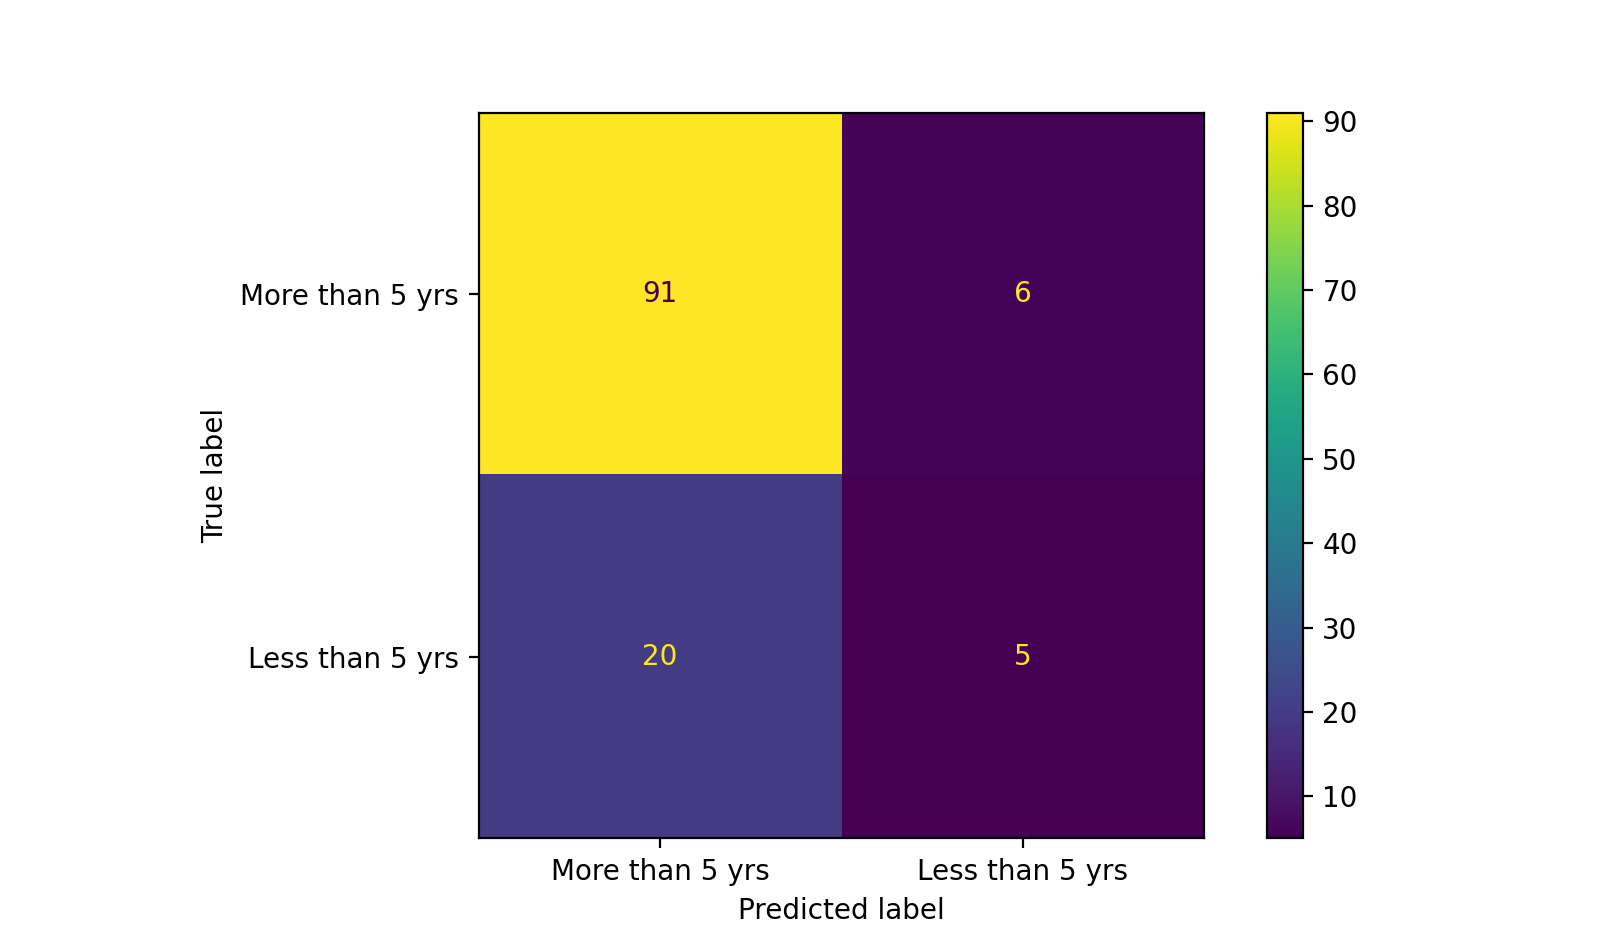

              precision    recall  f1-score   support

           1       0.82      0.94      0.88        97
           2       0.45      0.20      0.28        25

    accuracy                           0.79       122
   macro avg       0.64      0.57      0.58       122
weighted avg       0.74      0.79      0.75       122



<IPython.core.display.Javascript object>


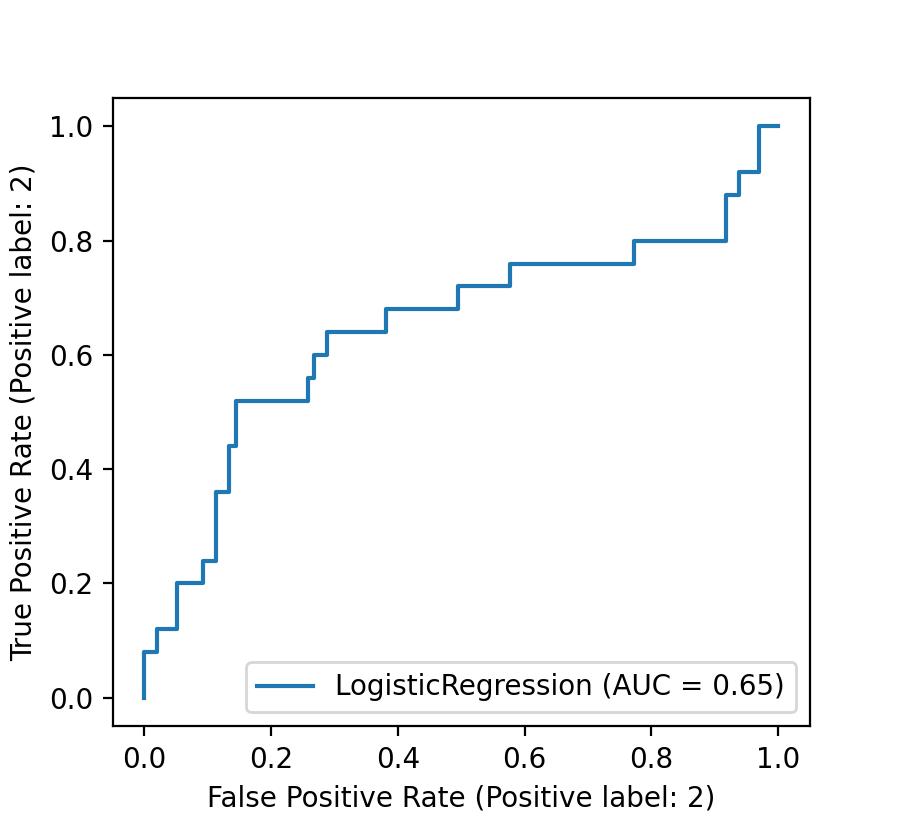

In [9]:
# Logistic Regression - This is the best model with a 79% accuracy and least amount of type II errors. The SVM also had 79% accuracy but logistic regression had the least amoun of tyep II error. Less people are being predicted to live >5 years but then not surviving.

clf = LogisticRegression(solver = "lbfgs", penalty = "l2", C = 0.01, random_state = 10).fit(X_train, y_train)
clf.score(X_test, y_test)
y_pred = clf.predict(X_test)
labels = ["More than 5 yrs", "Less than 5 yrs"]
cm = confusion_matrix(y_test, y_pred, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
disp.plot()
print(classification_report(y_test, y_pred, labels = clf.classes_))
plot_roc_curve(clf, X_test, y_test) 
plt.show()

<IPython.core.display.Javascript object>


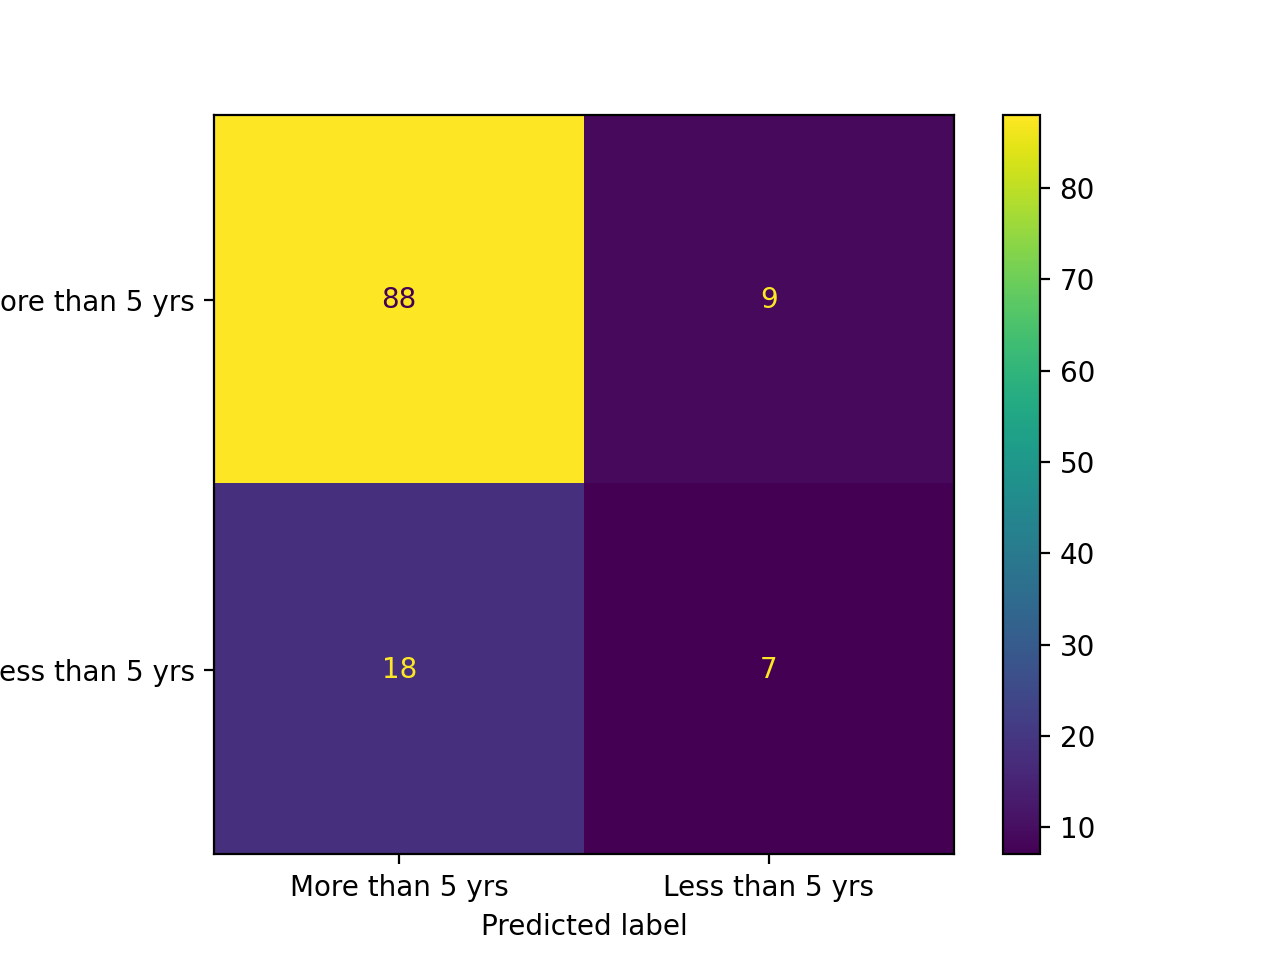

              precision    recall  f1-score   support

           1       0.83      0.91      0.87        97
           2       0.44      0.28      0.34        25

    accuracy                           0.78       122
   macro avg       0.63      0.59      0.60       122
weighted avg       0.75      0.78      0.76       122



<IPython.core.display.Javascript object>


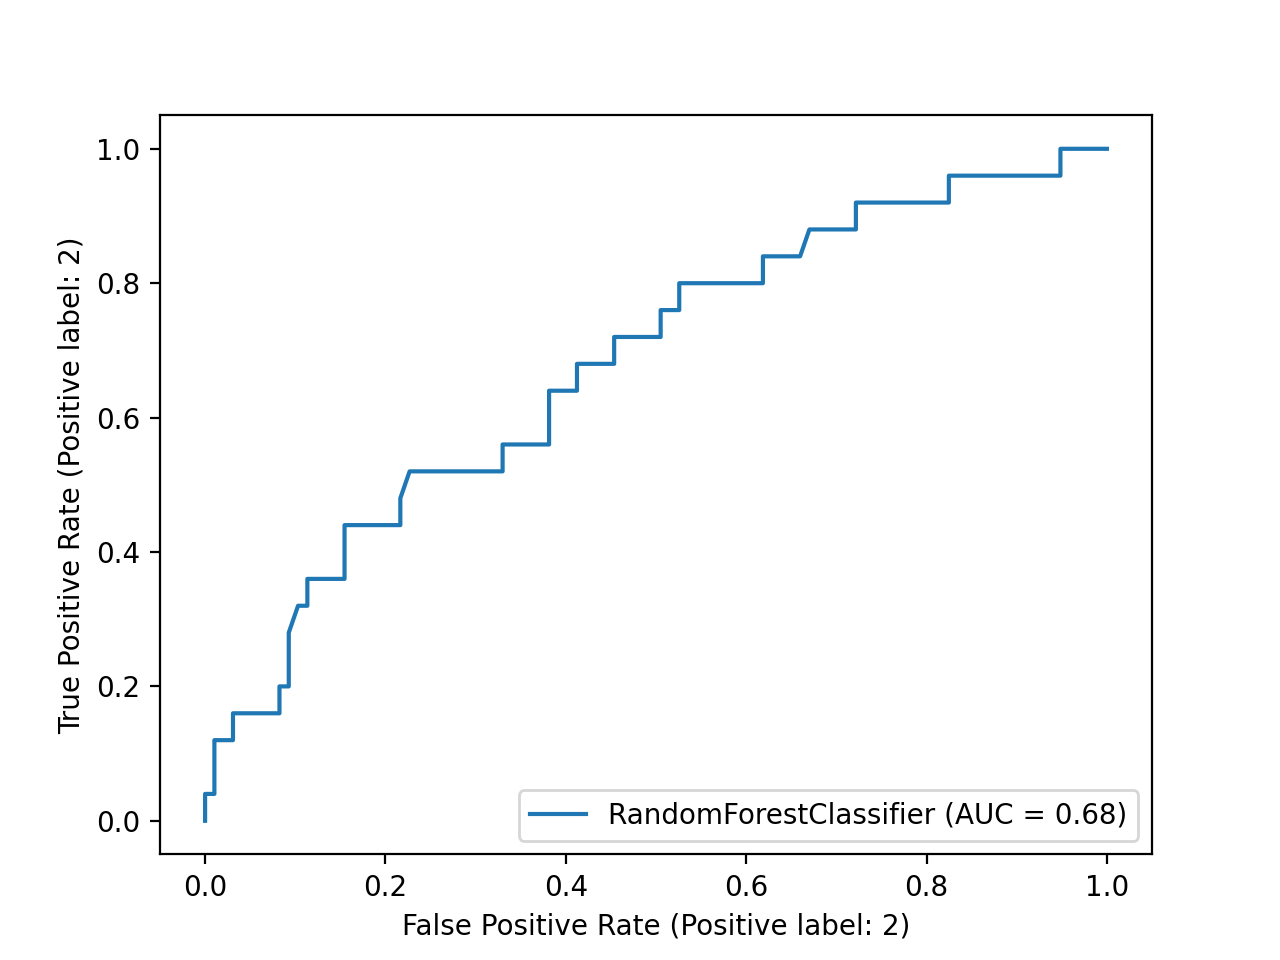

In [33]:
# Random Forest
rf = RandomForestClassifier(n_estimators = 10, max_depth = 5, max_features = 'sqrt', random_state = 0).fit(X_train, y_train)
rf_pred = rf.predict(X_test)
cm_rf = confusion_matrix(y_test, rf_pred, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_rf, display_labels = labels)
disp.plot()
print(classification_report(y_test, rf_pred, labels = clf.classes_))
plot_roc_curve(rf, X_test, y_test) 
plt.show()

<IPython.core.display.Javascript object>


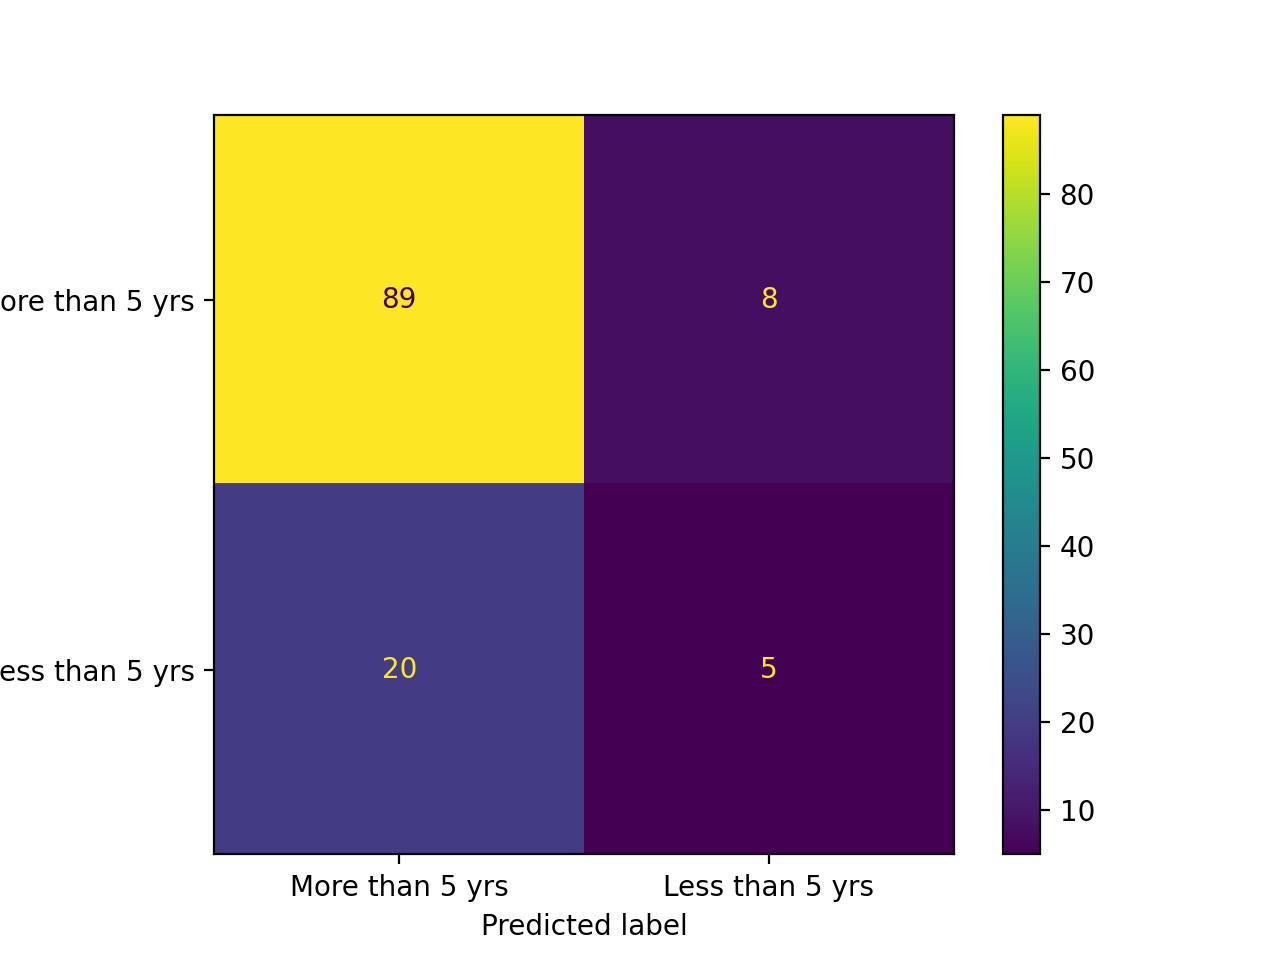

              precision    recall  f1-score   support

           1       0.82      0.92      0.86        97
           2       0.38      0.20      0.26        25

    accuracy                           0.77       122
   macro avg       0.60      0.56      0.56       122
weighted avg       0.73      0.77      0.74       122



<IPython.core.display.Javascript object>


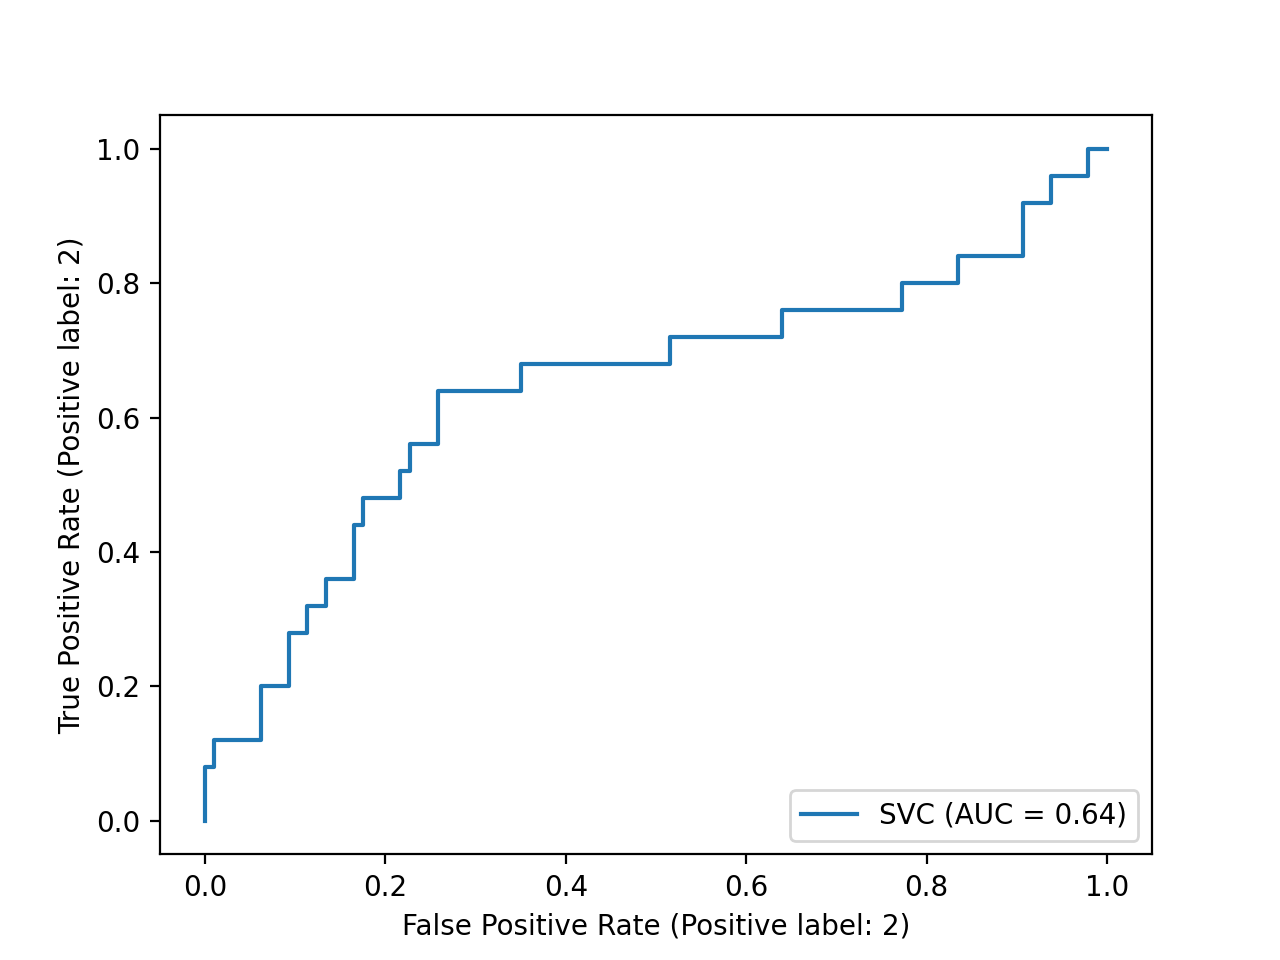

In [34]:
# Support Vector Machine
svm = SVC(random_state = 0, kernel = "linear", gamma = 1).fit(X_train, y_train)
svm_pred = svm.predict(X_test)
cm_svm = confusion_matrix(y_test, svm_pred, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_svm, display_labels = labels)
disp.plot()
print(classification_report(y_test, svm_pred, labels = clf.classes_))
plot_roc_curve(svm, X_test, y_test) 
plt.show()

In [21]:
# Grid search for parameter tuning

parameters = {'kernel':('linear', 'rbf', 'poly'), 'C':[1, 10]}

svm_grid = GridSearchCV(svm, parameters)
svm_grid.fit(X_train, y_train)
svm_grid.best_params_

{'C': 1, 'kernel': 'linear'}

C:\Users\haley\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


<IPython.core.display.Javascript object>


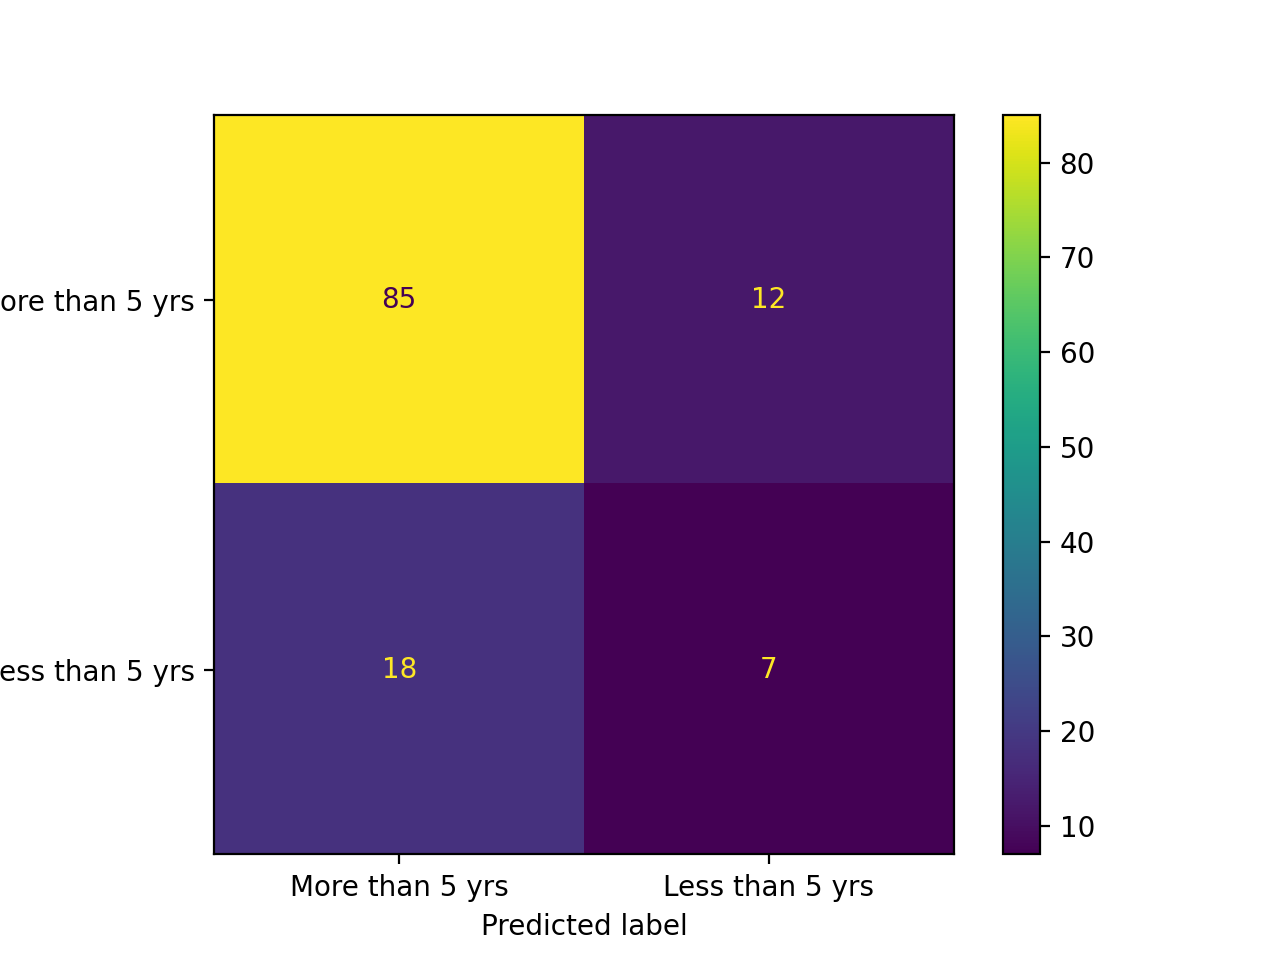

              precision    recall  f1-score   support

           1       0.83      0.88      0.85        97
           2       0.37      0.28      0.32        25

    accuracy                           0.75       122
   macro avg       0.60      0.58      0.58       122
weighted avg       0.73      0.75      0.74       122



In [11]:
# Neural Network

nn = MLPClassifier(solver = 'lbfgs', alpha = 0.0001, hidden_layer_sizes = (15,), random_state = 1, activation = "relu", learning_rate_init = 0.01).fit(X_train, y_train)

nn_pred = nn.predict(X_test)

cm_nn = confusion_matrix(y_test, nn_pred, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_nn, display_labels = labels)
disp.plot()
print(classification_report(y_test, nn_pred, labels = clf.classes_))

In [21]:
#Starting Quesion 3

# K-fold cross validation The logistic regression model is performing well to slightly underfitting. The models average accuracy is 72% vs the test average accuracy of 79%.

kf = KFold(n_splits=10)

iteration = 1
for train_indices, test_indices in kf.split(X_train):
    clf.fit(X_train.iloc[train_indices], y_train.iloc[train_indices])
    print("Accuracy for iteration "+ str(iteration) + " is " + str(clf.score(X_train.iloc[test_indices], y_train.iloc[test_indices])))
    iteration += 1


Accuracy for iteration 1 is 0.6842105263157895
Accuracy for iteration 2 is 0.7894736842105263
Accuracy for iteration 3 is 0.631578947368421
Accuracy for iteration 4 is 0.7222222222222222
Accuracy for iteration 5 is 0.6666666666666666
Accuracy for iteration 6 is 0.8333333333333334
Accuracy for iteration 7 is 0.8333333333333334
Accuracy for iteration 8 is 0.7777777777777778
Accuracy for iteration 9 is 0.6666666666666666
Accuracy for iteration 10 is 0.6666666666666666


In [35]:
# K-fold cross validation Random Forest The model is underfitting. The random forest models average accuracy is below the test average accuracy of 78%.

kf = KFold(n_splits=10)

iteration = 1
for train_indices, test_indices in kf.split(X_train):
    rf.fit(X_train.iloc[train_indices], y_train.iloc[train_indices])
    print("Accuracy for iteration "+ str(iteration) + " is " + str(rf.score(X_train.iloc[test_indices], y_train.iloc[test_indices])))
    iteration += 1

Accuracy for iteration 1 is 0.631578947368421
Accuracy for iteration 2 is 0.631578947368421
Accuracy for iteration 3 is 0.631578947368421
Accuracy for iteration 4 is 0.5555555555555556
Accuracy for iteration 5 is 0.6666666666666666
Accuracy for iteration 6 is 0.7222222222222222
Accuracy for iteration 7 is 0.7777777777777778
Accuracy for iteration 8 is 0.7777777777777778
Accuracy for iteration 9 is 0.5555555555555556
Accuracy for iteration 10 is 0.7777777777777778


In [19]:
# Grid search for parameter tuning

parameters = {'kernel':('linear', 'rbf', 'poly'), 'C':[1, 10]}

svm_grid = GridSearchCV(svm, parameters)
svm_grid.fit(X_train, y_train)
svm_grid.best_params_

{'C': 1, 'kernel': 'linear'}

In [ ]:
# Question 4

I have now watched the machine learning tutorial 3 times and looked through the notebook and still don't understand how to accomplish question 4. It seems like the tutorial stops before you create a machine or I am just too tired. 
I have googled a lot and read many articles to get to this point but now am tired and stuck and need to go to work.
Thank you for extending the deadline!